In [17]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from astropy.constants import c, eps0
from matplotlib.ticker import StrMethodFormatter
import astropy.units as u

In [8]:
datafile = "tkid_cpw/parasitic_capacitance_double_port_2000_Z_params.csv"
zparamdata = np.genfromtxt(datafile, comments='!', delimiter=',', skip_header=8)

In [9]:
frequency = zparamdata[:, 0] * 1000 * u.MHz
Z11 = (zparamdata[:,1] + 1j * zparamdata[:,2]) * u.Ohm
Z12 = (zparamdata[:,3] + 1j * zparamdata[:,4]) * u.Ohm
Z21 = (zparamdata[:,5] + 1j * zparamdata[:,6]) * u.Ohm
Z22 = (zparamdata[:,7] + 1j * zparamdata[:,8]) * u.Ohm

In [10]:
detZ = Z11 * Z22 - Z12 * Z21
Y11 = Z22/detZ
Y12 = -Z12/detZ
Y21 = -Z21/detZ
Y22 = Z11/detZ

In [13]:
np.real(Z12 - Z21)[:10] # Check if the system is indeed reciprocal

<Quantity [  2.99999608e-13,  0.00000000e+00,  0.00000000e+00,
             9.99998695e-14,  0.00000000e+00,  0.00000000e+00,
             0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
             0.00000000e+00] Ohm>

In [15]:
# - Y12 gives the capacitance between the coplanar layer and resonator tank
R_12 = 1/np.real(-Y12) # Do we have any losses between the two
C_12 = (np.imag(-Y12)/(2*np.pi*frequency)).to('pF')

# Total Coupling of tank to ground 
C1g = (np.imag(Y11)/(2*np.pi*frequency)).to('pF')

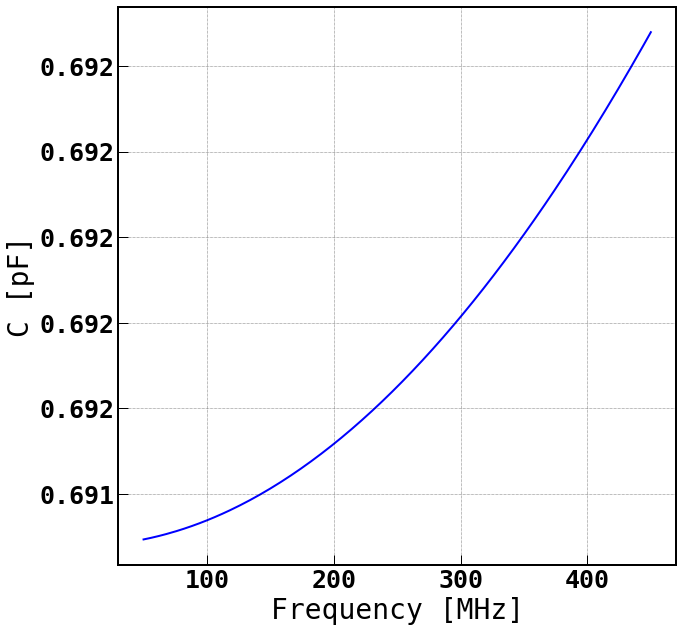

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(frequency, C1g, 'b', label="Total")
ax.set_xlabel(r'Frequency [MHz]')
ax.set_ylabel(r'C [pF]')
ax.grid(which='both')
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:1.3f}"))
ax.axis('tight');

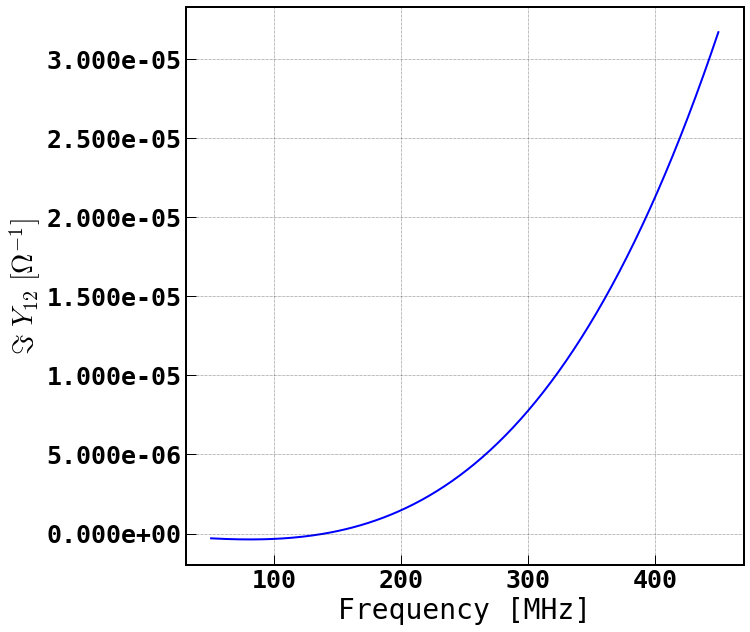

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(frequency, np.imag(Y12), 'b')
ax.set_xlabel(r'Frequency [MHz]')
ax.set_ylabel(r'$\Im\ Y_{12}\ [\Omega^{-1}]$')
ax.grid(which='both')
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:1.3e}"))
ax.axis('tight');